# Curso: "El lenguaje de programación Python para la docencia en el ámbito científico"

&nbsp;  
<img src="../images/logo_python_letras.png" align="center" style="width:350px;"/>

<strong><div style="text-align: center"> [Mabel Delgado Babiano](https://es.linkedin.com/in/mabeldelgadob)</div></strong>

&nbsp;  
<div style="text-align: center">Heredia, Costa Rica</div>
<div style="text-align: center">4 - 7 Febrero 2019</div>


# NumPy: Slicing y Broadcasting

_Hasta ahora sabemos cómo crear arrays y realizar algunas operaciones con ellos, sin embargo, todavía no hemos aprendido cómo acceder a elementos concretos del array por su índice o **indexing**, o bien, cómo extraer secciones del array o **slicing**._

_Por otro lado, vamos a aprender qué es el **broadcasting** y como funciona._

 *¿Estás preparado/a? ¡¡Pues Empezamos!!*

In [4]:
# En primer lugar, importamos la librería numpy
import numpy as np

## Indexing

El **indexing nos permite extraer un elemento de un array**, pero, hay que tener muy presente y saber que lo que extraemos es una **vista o view de ese elemento del array, y no una copia**.

### Arrays de una dimensión

In [6]:
# Creamos un array
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# Accediendo al primer elemento
arr[0] 

0

In [8]:
# Accediendo al último
arr[-1]

9

In [9]:
# Accediendo al penúltimo
arr[-2]

8

##### __¡Cuidado!__ 

NumPy devuelve __vistas__ de la sección que le pidamos, no __copias__. Esto quiere decir que debemos prestar mucha atención a este comportamiento:

In [10]:
arr = np.arange(10)
a = arr[5:]

print(arr)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[5 6 7 8 9]


In [11]:
arr[5] = 999

print(arr)
print(a)

[  0   1   2   3   4 999   6   7   8   9]
[999   6   7   8   9]


Lo mismo ocurre al revés:

In [12]:
arr = np.arange(10)
a = arr[5:]

print(arr)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[5 6 7 8 9]


In [13]:
a[-1] = 999

print(arr)
print(a)

[  0   1   2   3   4   5   6   7   8 999]
[  5   6   7   8 999]


`a` apunta a las direcciones de memoria donde están guardados los elementos del array `arr` que hemos seleccionado, no copia sus valores, a menos que explícitamente hagamos:

In [14]:
arr = np.arange(10)
a = arr[5:].copy()

print(arr)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[5 6 7 8 9]


In [15]:
arr[5] = 999

print(arr)
print(a)

[  0   1   2   3   4 999   6   7   8   9]
[5 6 7 8 9]


### Arrays de dos dimensiones

In [16]:
arr = np.arange(9).reshape([3, 3])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [17]:
arr[0, -1]

2

In [13]:
arr[2, 2]

8

## Slicing: Secciones de arrays

Hasta ahora hemos visto cómo acceder a elementos aislados del array, pero la potencia de NumPy está en poder extraer **secciones enteras**, y esto es lo que nos permite hacer el **slicing**. Para ello se usa la sintaxis `inicio:final:paso`, teniendo en cuenta que si alguno de estos valores no se pone toma un valor por defecto.

De igual forma que con el indexing, lo que obtenemos es una vista o view del array, y no una copia, **para extraer una copia, habría que agregar**  `.copy()` a la hora de hacer la sección.

### Arrays de una dimensión

In [18]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
# Extraer sólo los elementos con índice par o cero
a[::2]

array([0, 2, 4, 6, 8])

In [23]:
# Extraer elementos de tres en tres empezando por el final
a[-1::-3]

array([9, 6, 3, 0])

### Arrays de dos dimensiones

In [24]:
M = np.arange(36, dtype=float).reshape(4, 9)
M

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23., 24., 25., 26.],
       [27., 28., 29., 30., 31., 32., 33., 34., 35.]])

In [25]:
# De la segunda a la tercera fila, incluida
M[1:3]

array([[ 9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23., 24., 25., 26.]])

In [26]:
# Hasta la tercera fila sin incluir y de la segunda a la quinta columnas saltando dos
M[:2, 1:5:2]
# M[1:2:1, 1:5:2]  # Equivalente

array([[ 1.,  3.],
       [10., 12.]])

#### Ejercicio

Pintar un tablero de ajedrez usando la función `plt.matshow`.

In [30]:
tablero = np.zeros([8, 8], dtype=int)

tablero[0::2, 0::2] = 1
tablero[1::2, 1::2] = 1

tablero

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

In [31]:
import matplotlib.pyplot as plt

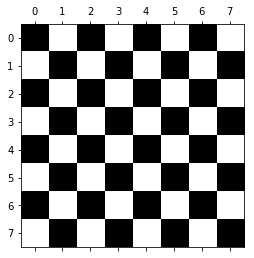

In [32]:
plt.matshow(tablero, cmap=plt.cm.gray_r)

## Bradcasting

El **broadcasting** es una caracteristica muy peculiar que tiene NumPy, pero a a la vez muy potente, ya que **nos permite hacer operaciones entre arrays muy fácilmente, sin que tengan que tener el mismo número de elementos en cada dimensión**, y siempre que puedan ser compatibles y extenderse hasta alcanzar la dimensión del otro array con el que se quiere operar.

<img src="../images/numpy-broadcasting.png" align="center"  width=500px>

In [33]:
u4 = np.arange(4).reshape((-1, 1))
u4

array([[0],
       [1],
       [2],
       [3]])

In [34]:
v3 = np.arange(3)
v3

array([0, 1, 2])

In [35]:
u4 * v3

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4],
       [0, 3, 6]])

#### Ejercicio

Dado un array unidimensional con las distancias de una seria de puntos a un punto de referencia, calcula las distancias relativas entre sí de todos los puntos datos.

In [38]:
lugares = ["A", "B", "C", "D", "E"]
distancias = np.array( [120, 45, 69, 90, 100])

Usando las ventajas del broadcasting, podemos calcular fáclmente las distancias relativas entre todos estos puntos:

In [39]:
distancias_relativas = distancias.reshape((-1, 1)) - distancias
distancias_relativas

array([[  0,  75,  51,  30,  20],
       [-75,   0, -24, -45, -55],
       [-51,  24,   0, -21, -31],
       [-30,  45,  21,   0, -10],
       [-20,  55,  31,  10,   0]])

--- 

__Referencias__

Material adaptado del "Curso AeroPython". AeroPython. https://github.com/AeroPython <br>

 <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para aplicarla el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [20]:
# preserve
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/style.css'
HTML(open(css_file, "r").read())